In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv('cleaned_data.csv')

/var/folders/2j/y6h_hz2s3wb4hr3310skl0fc0000gn/T/ipykernel_70999/1139031434.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


In [20]:
df.head(50)

,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Original Currency,Purchase Amount (USD),Subscription Start Date,Subscription Expiration,Demo User,...,Email Subscriber,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count,App Session Platform,App Activity Type,App Session Date
0,350,ITA,Limited,RENEWAL,App,NaN,NaN,3/19/2020,12/26/2020,No,...,Yes,Yes,4.0,3.0,0.0,2.0,0.0,ios,Completed,2/3/2020
1,371,FRA,Limited,RENEWAL,App,NaN,NaN,1/4/2020,7/4/2020,Yes,...,Yes,Yes,6.0,0.0,0.0,0.0,0.0,ios,Completed,2/3/2020
2,550,ENG,Limited,RENEWAL,App,NaN,NaN,3/29/2020,10/22/2020,No,...,No,Yes,1.0,0.0,0.0,0.0,0.0,ios,Completed,2/3/2020
3,717,POR,Limited,RENEWAL,App,NaN,NaN,3/22/2020,6/26/2020,No,...,No,Yes,1.0,0.0,0.0,0.0,0.0,ios,Completed,2/3/2020
4,1243,ESP,Limited,RENEWAL,App,NaN,NaN,11/25/2019,5/25/2020,Yes,...,Yes,Yes,2.0,0.0,0.0,0.0,0.0,ios,Completed,2/3/2020
5,1460,ITA,Limited,INITIAL_PURCHASE,App,NaN,NaN,6/17/2019,6/22/2020,Yes,...,No,Yes,NaN,NaN,NaN,NaN,NaN,ios,Completed,2/3/2020
6,1494,FRA,Limited,INITIAL_PURCHASE,App,NaN,NaN,1/4/2020,7/4/2020,Yes,...,Yes,Yes,6.0,4.0,0.0,2.0,0.0,ios,Completed,2/3/2020
7,1631,FRA,Limited,INITIAL_PURCHASE,App,NaN,NaN,1/27/2020,1/27/2021,Yes,...,Yes,Yes,10.0,1.0,0.0,1.0,0.0,ios,Completed,2/3/2020
8,1721,ESP,Limited,INITIAL_PURCHASE,App,NaN,NaN,3/22/2020,1/25/2021,Yes,...,Yes,Yes,14.0,6.0,0.0,3.0,0.0,ios,Completed,2/3/2020
9,1764,ESP,Limited,RENEWAL,App,NaN,NaN,12/24/2019,6/24/2020,Yes,...,Yes,Yes,3.0,2.0,2.0,1.0,1.0,ios,Completed,2/3/2020


In [21]:
df.columns

Index(['ID', 'Language', 'Subscription Type', 'Subscription Event Type',
       'Purchase Store', 'Original Currency', 'Purchase Amount (USD)',
       'Subscription Start Date', 'Subscription Expiration', 'Demo User',
       'Free Trial User', 'Free Trial Start Date', 'Free Trial Expiration',
       'Auto Renew', 'Country', 'User Type', 'Lead Platform',
       'Email Subscriber', 'Push Notifications', 'Send Count', 'Open Count',
       'Click Count', 'Unique Open Count', 'Unique Click Count',
       'App Session Platform', 'App Activity Type', 'App Session Date'],
      dtype='object')

In [22]:
df.dtypes

ID                           int64
Language                    object
Subscription Type           object
Subscription Event Type     object
Purchase Store              object
Original Currency           object
Purchase Amount (USD)      float64
Subscription Start Date     object
Subscription Expiration     object
Demo User                   object
Free Trial User             object
Free Trial Start Date       object
Free Trial Expiration       object
Auto Renew                  object
Country                     object
User Type                   object
Lead Platform               object
Email Subscriber            object
Push Notifications          object
Send Count                 float64
Open Count                 float64
Click Count                float64
Unique Open Count          float64
Unique Click Count         float64
App Session Platform        object
App Activity Type           object
App Session Date            object
dtype: object

In [23]:
df.shape

(460979, 27)

In [24]:
# count NaN values for all columns
nan_counts = df.isna().sum()

print(nan_counts)

ID                              0
Language                        0
Subscription Type               0
Subscription Event Type         0
Purchase Store                  0
Original Currency          280603
Purchase Amount (USD)      280911
Subscription Start Date         0
Subscription Expiration         0
Demo User                       0
Free Trial User                 0
Free Trial Start Date      350423
Free Trial Expiration      350423
Auto Renew                      0
Country                         0
User Type                       0
Lead Platform                   0
Email Subscriber                0
Push Notifications              0
Send Count                 166112
Open Count                 166112
Click Count                166112
Unique Open Count          166112
Unique Click Count         166112
App Session Platform        17059
App Activity Type               0
App Session Date                0
dtype: int64


                                                ID  Purchase Amount (USD)  \
ID                                        1.000000              -0.040184   
Purchase Amount (USD)                    -0.040184               1.000000   
Send Count                                0.133259              -0.196499   
Open Count                               -0.073255               0.016007   
Click Count                              -0.031699              -0.013406   
Unique Open Count                        -0.073206               0.026831   
Unique Click Count                       -0.035120              -0.015356   
Subscription Type_Limited                      NaN                    NaN   
Subscription Event Type_INITIAL_PURCHASE  0.097886              -0.286297   
Subscription Event Type_RENEWAL          -0.097886               0.286297   
Demo User_No                             -0.038161              -0.028177   
Demo User_Yes                             0.038161               0.028177   

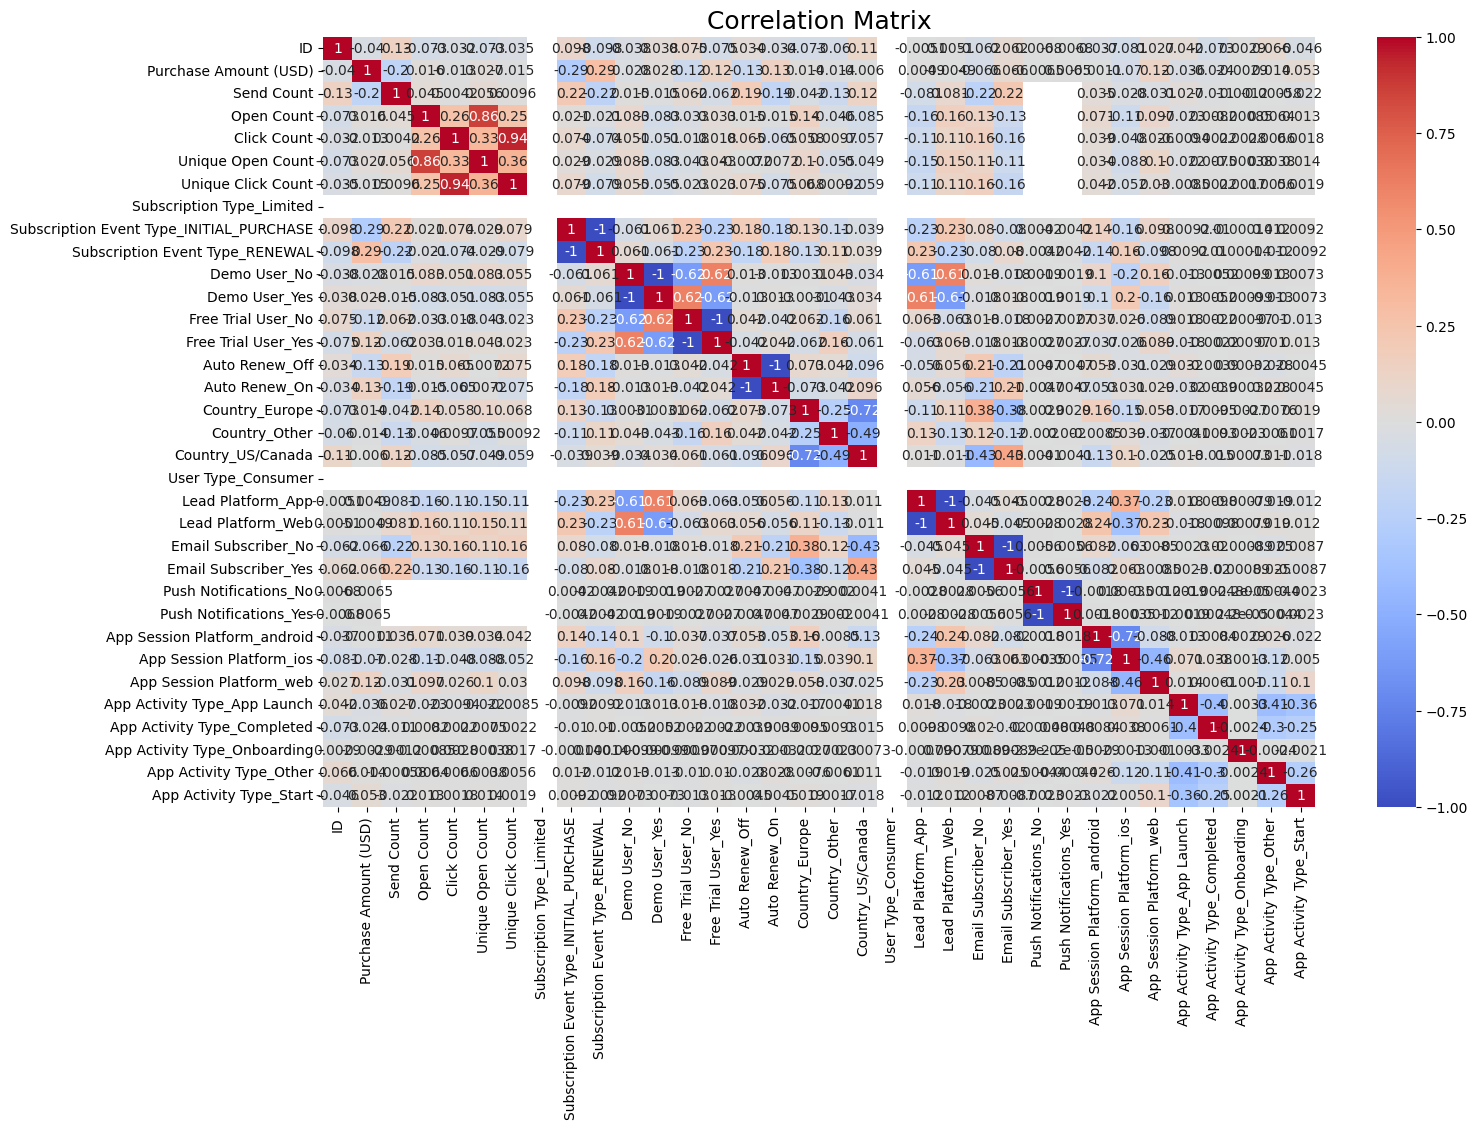

In [25]:
# identify the categorical columns and create dummy variables
cat_cols = ['Subscription Type', 'Subscription Event Type', 'Demo User', 'Free Trial User', 'Auto Renew', 'Country', 'User Type', 'Lead Platform', 'Email Subscriber', 'Push Notifications', 'App Session Platform', 'App Activity Type']
dummy_df = pd.get_dummies(df[cat_cols])

# include numerical and dummy variables in the correlation matrix
corr_df = pd.concat([df.select_dtypes(include=[np.number]), dummy_df], axis=1).corr()
print(corr_df)


# set up the figure size
plt.figure(figsize=(16, 10))

# create the heatmap
sns.heatmap(corr_df, cmap='coolwarm', annot=True, annot_kws={"size": 10})

# add title and adjust font size
plt.title('Correlation Matrix', fontsize=18)

# show the plot
plt.show()

# merge the dummy variables back into the original DataFrame
df = pd.concat([df, dummy_df], axis=1)

# drop the original categorical columns
df.drop(cat_cols, axis=1, inplace=True)

In [26]:
# sort the correlation matrix by Purchase Amount (USD)
corr_df = corr_df.sort_values(by=['Purchase Amount (USD)'], ascending=False)

# select the top 5 variables with the highest correlation values
top_5_vars = list(corr_df['Purchase Amount (USD)'][1:6].index)

# select the bottom 5 variables with the lowest correlation values
bottom_5_vars = list(corr_df['Purchase Amount (USD)'][-6:-1].index)

# output the top 5 and least 5 variables with their corresponding correlation values
print('Top 5 variables that heavily influence Purchase Amount (USD):')
print(corr_df.loc[top_5_vars, 'Purchase Amount (USD)'])
print('\nLeast 5 variables that influence Purchase Amount (USD):')
print(corr_df.loc[bottom_5_vars, 'Purchase Amount (USD)'])

Top 5 variables that heavily influence Purchase Amount (USD):
Subscription Event Type_RENEWAL    0.286297
Auto Renew_On                      0.134676
App Session Platform_web           0.121424
Free Trial User_Yes                0.121348
Email Subscriber_Yes               0.065804
Name: Purchase Amount (USD), dtype: float64

Least 5 variables that influence Purchase Amount (USD):
Free Trial User_No                         -0.121348
Auto Renew_Off                             -0.134676
Send Count                                 -0.196499
Subscription Event Type_INITIAL_PURCHASE   -0.286297
Subscription Type_Limited                        NaN
Name: Purchase Amount (USD), dtype: float64


In [27]:
corr_df.shape

(34, 34)

In [28]:
df.dtypes


ID                                            int64
Language                                     object
Purchase Store                               object
Original Currency                            object
Purchase Amount (USD)                       float64
Subscription Start Date                      object
Subscription Expiration                      object
Free Trial Start Date                        object
Free Trial Expiration                        object
Send Count                                  float64
Open Count                                  float64
Click Count                                 float64
Unique Open Count                           float64
Unique Click Count                          float64
App Session Date                             object
Subscription Type_Limited                     uint8
Subscription Event Type_INITIAL_PURCHASE      uint8
Subscription Event Type_RENEWAL               uint8
Demo User_No                                  uint8
Demo User_Ye

In [29]:
# Drop unsuitable columns
df.drop(['ID', 'Language', 'Purchase Store', 'Original Currency', 'Subscription Start Date', 
         'Subscription Expiration', 'Free Trial Start Date', 'Free Trial Expiration',
         'App Session Date', 'Subscription Type_Limited', 'User Type_Consumer'], axis=1, inplace=True)

# Fill NaN values with median
df.fillna(df.median(), inplace=True)

# Separate the independent variables and the target variable
X = df.drop(['Purchase Amount (USD)'], axis=1)
y = df['Purchase Amount (USD)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the testing set and calculate the mean squared error
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
print('Linear Regression Mean Squared Error:', lr_mse)


Linear Regression Mean Squared Error: 620.0322674302872


In [30]:
X.columns

Index(['Send Count', 'Open Count', 'Click Count', 'Unique Open Count',
       'Unique Click Count', 'Subscription Event Type_INITIAL_PURCHASE',
       'Subscription Event Type_RENEWAL', 'Demo User_No', 'Demo User_Yes',
       'Free Trial User_No', 'Free Trial User_Yes', 'Auto Renew_Off',
       'Auto Renew_On', 'Country_Europe', 'Country_Other', 'Country_US/Canada',
       'Lead Platform_App', 'Lead Platform_Web', 'Email Subscriber_No',
       'Email Subscriber_Yes', 'Push Notifications_No',
       'Push Notifications_Yes', 'App Session Platform_android',
       'App Session Platform_ios', 'App Session Platform_web',
       'App Activity Type_App Launch', 'App Activity Type_Completed',
       'App Activity Type_Onboarding', 'App Activity Type_Other',
       'App Activity Type_Start'],
      dtype='object')

In [31]:
purchase_amount_mean = df['Purchase Amount (USD)'].mean()
print('Purchase Amount Mean:', purchase_amount_mean)

Purchase Amount Mean: 38.72733108308373


In [32]:
# Print the coefficients and variable names in descending order of magnitude
coef_pairs = sorted(zip(lr_model.coef_, X.columns), reverse=True)
for coef, feature_name in coef_pairs:
    print(feature_name, ':', coef)

App Session Platform_web : 15.357407580604352
App Session Platform_android : 5.818933820412343
App Activity Type_Other : 5.344346178126383
App Activity Type_Start : 5.208566592688075
Demo User_Yes : 5.1336009417783295
Lead Platform_Web : 4.724680874962757
Free Trial User_Yes : 3.8596164433934694
Subscription Event Type_RENEWAL : 3.6663761125650995
App Activity Type_App Launch : 3.50321238116153
Push Notifications_Yes : 3.4996564275873743
App Activity Type_Completed : 3.2824900942087742
Unique Open Count : 1.9769604048701694
Country_Europe : 1.6269262947784737
Email Subscriber_Yes : 1.0223435229956332
Click Count : 0.7492046962721682
Auto Renew_On : 0.6643517994352167
App Session Platform_ios : 0.11956776300521174
Country_US/Canada : -0.10844211062705277
Open Count : -0.11507456977359157
Send Count : -0.2682541662141286
Auto Renew_Off : -0.6643517994352192
Email Subscriber_No : -1.0223435229956288
Country_Other : -1.518484184151422
Unique Click Count : -2.081856194430761
Push Notificati

In [33]:
# Predict purchase amount for the testing set
lr_predictions = lr_model.predict(X_test)

# Create a DataFrame to display the actual purchase amounts and the predicted purchase amounts
predictions_df = pd.DataFrame({'Actual Purchase Amount (USD)': y_test, 'Predicted Purchase Amount (USD)': lr_predictions})

# Print the first 10 rows of the DataFrame
predictions_df.head(30)


,Actual Purchase Amount (USD),Predicted Purchase Amount (USD)
329967,0.00000,44.322445
39551,35.97000,32.720440
104850,35.97000,30.474208
138693,35.97000,34.437216
340320,35.97000,41.802312
395917,35.97000,37.711316
213006,79.00000,40.001209
23718,35.97000,41.207598
111459,35.97000,43.911190
314787,35.97000,32.829507


In [34]:


# Fill NaN values with median
df.fillna(df.median(), inplace=True)

# Separate the independent variables and the target variable
X = df.drop(['Purchase Amount (USD)'], axis=1)
y = df['Purchase Amount (USD)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set and calculate the mean squared error
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print('Random Forest Mean Squared Error:', rf_mse)

# Print feature importances for Random Forest Regressor
rf_feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print('Random Forest Feature Importances:')
print(rf_feature_importances)

Random Forest Mean Squared Error: 300.2077104103103
Random Forest Feature Importances:
                                            Importance
Send Count                                2.575038e-01
Open Count                                1.040793e-01
Unique Open Count                         5.891547e-02
Lead Platform_Web                         5.645857e-02
Country_Europe                            4.565216e-02
App Session Platform_android              4.164139e-02
Auto Renew_Off                            3.856487e-02
Country_US/Canada                         3.538127e-02
Email Subscriber_No                       3.437469e-02
Subscription Event Type_RENEWAL           3.363248e-02
App Session Platform_web                  3.320315e-02
Email Subscriber_Yes                      2.754491e-02
Auto Renew_On                             2.677963e-02
Free Trial User_No                        2.620235e-02
App Session Platform_ios                  2.370190e-02
Lead Platform_App                

In [35]:
# Make predictions on the testing set
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print('Random Forest Mean Squared Error:', rf_mse)

# Show actual and predicted purchase amounts for the test set
results = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})
results.head(20)

Random Forest Mean Squared Error: 300.2077104103103


,Actual,Predicted
329967,0.0000,0.000000
39551,35.9700,21.993156
104850,35.9700,32.016128
138693,35.9700,35.970000
340320,35.9700,35.970000
395917,35.9700,35.970000
213006,79.0000,79.000000
23718,35.9700,60.313077
111459,35.9700,35.970000
314787,35.9700,45.972506


In [36]:

lr_r2 = r2_score(y_test, lr_predictions)
print('Linear Regression R-squared:', lr_r2)

Linear Regression R-squared: 0.06998645201778564


In [37]:
rf_r2 = r2_score(y_test, rf_predictions)
print('Random Forest R-squared:', rf_r2)

Random Forest R-squared: 0.5497053096164852


In [38]:


# # Separate the independent variables and the target variable
# X = df.drop(['Purchase Amount (USD)'], axis=1)
# y = df['Purchase Amount (USD)']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Create a pipeline to scale the features and fit the SVR model
# svr_model = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1, epsilon=0.1))

# # Fit the model on the training data
# svr_model.fit(X_train, y_train)

# # Make predictions on the testing set and calculate the R-squared value
# svr_predictions = svr_model.predict(X_test)
# svr_r2 = svr_model.score(X_test, y_test)
# print('SVR R-squared:', svr_r2)


In [40]:
# Print feature importances for Random Forest Regressor
rf_feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print('Random Forest Feature Importances (Top 10):')
print(rf_feature_importances[:10])

Random Forest Feature Importances (Top 10):
                                 Importance
Send Count                         0.257504
Open Count                         0.104079
Unique Open Count                  0.058915
Lead Platform_Web                  0.056459
Country_Europe                     0.045652
App Session Platform_android       0.041641
Auto Renew_Off                     0.038565
Country_US/Canada                  0.035381
Email Subscriber_No                0.034375
Subscription Event Type_RENEWAL    0.033632


In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Show the correlation between all variables and Purchase Amount (USD)
print(corr_matrix['Purchase Amount (USD)'].sort_values(ascending=False))